Connection successful!


C:\Users\x3000\AppData\Local\Temp\ipykernel_37448\2269199820.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT latitude, longitude FROM homicide_data WHERE latitude IS NOT NULL", conn)


Found these 10 Hotspot Centers (Lat, Lon):
[[  27.46135222  -81.30979627]
 [  38.1073383  -106.02372052]
 [  40.32373602  -75.00545172]
 [  41.4748229  -122.35506309]
 [  32.88527852  -89.35396451]
 [  41.61412034  -85.82618631]
 [  34.2117764  -117.14650309]
 [  32.37169982  -96.41082613]
 [  34.80397623  -81.78406535]
 [  23.0906577  -157.60095637]]


C:\Users\x3000\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


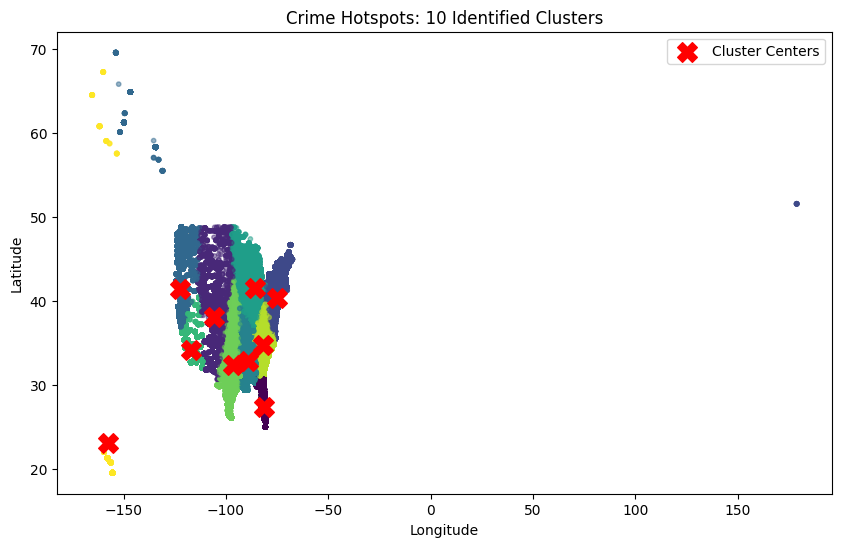

In [2]:
import psycopg2
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

try:
    conn = psycopg2.connect(
        dbname="urban_data",
        user="postgres",
        password="12345",
        host="localhost",
        port="5432"
    )
    print("Connection successful!")

    # 2. Create a 'Cursor'
    cur = conn.cursor()
except Exception as e:
    print(f"Error connecting to database: {e}")
# 1. Get data from the DB
df = pd.read_sql("SELECT latitude, longitude FROM homicide_data WHERE latitude IS NOT NULL", conn)

# 2. Prepare the "Coordinates" for the algorithm
#drop any rows that might have missing coordinates
coords = df[['latitude', 'longitude']].dropna()

# 3. Initialize and Run K-Means
# Let's look for 10 "Hotspot" clusters
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
df['cluster_id'] = kmeans.fit_predict(coords)

# 4. See the "Centers" of your clusters (The Hotspots)
centroids = kmeans.cluster_centers_
print("Found these 10 Hotspot Centers (Lat, Lon):")
print(centroids)

# 5. Quick Visualization
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c=df['cluster_id'], cmap='viridis', s=10, alpha=0.5)
plt.scatter(centroids[:, 1], centroids[:, 0], c='red', marker='X', s=200, label='Cluster Centers')
plt.title(f"Crime Hotspots: {num_clusters} Identified Clusters")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()